In [2]:
#Passo 3: Extração e obtenção de dados
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)


#Passo 4: Ajustes de dados (Tratamento ou limpeza)



,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


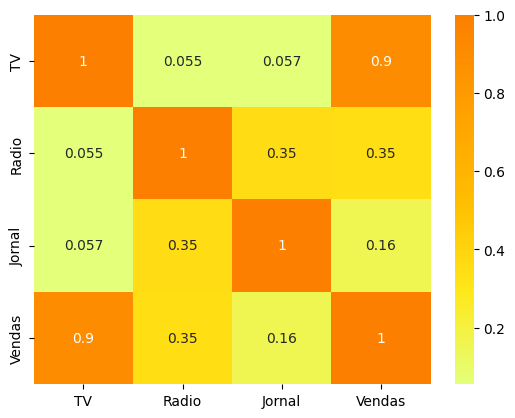

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


#Passo 5: Analise Exploratoria
display(tabela.corr())
#cria o grafico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

#exibir o grafico
plt.show()


In [85]:
from sklearn.model_selection import train_test_split
#Passo 6: Modelagem + Algoritimos (IA)
# y -> é quem vc quer prever
y = tabela["Vendas"]

# x-> quem eu vou usar pra prever as vendas
x = tabela[["TV", "Radio", "Jornal"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20)


In [86]:
# importa ela
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#cria ela
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treina ela
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

print("modelos treinados")

modelos treinados


In [87]:
#Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

#fazer previsões
prev_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
prev_regressaolinear = modelo_regressaolinear.predict(x_teste)

#comprar previsões
print(r2_score(y_teste, prev_arvoredecisao))
print(r2_score(y_teste, prev_regressaolinear))


0.9650849382903808
0.9000026256232303


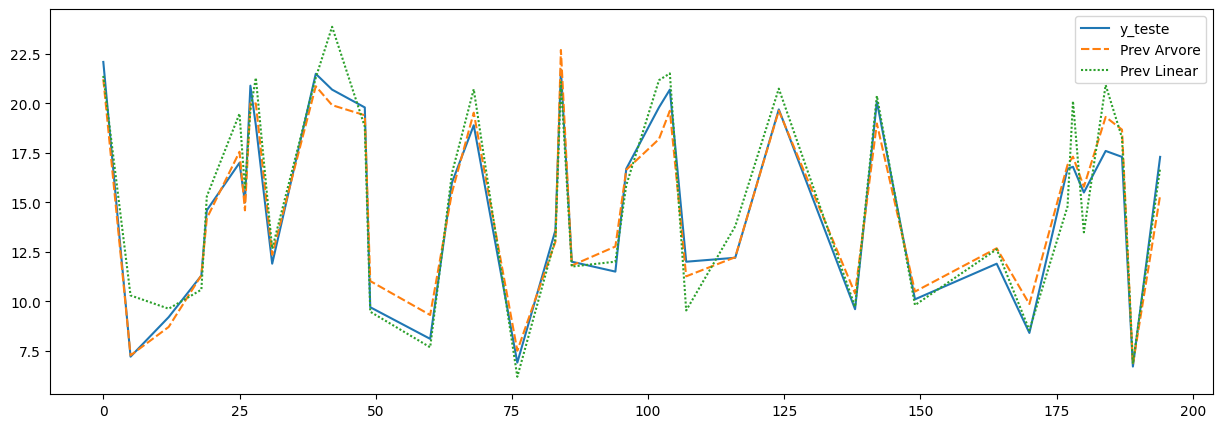

In [88]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Prev Arvore'] = prev_arvoredecisao
tabela_auxiliar['Prev Linear'] = prev_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data = tabela_auxiliar)
plt.show()

In [89]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)



,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [90]:
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.609  9.366 20.211]
